In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [3]:
#before doing these please make a folder as train data and in the train folder create another six folder for six defects
#These six folder should have 300 images.
try:
    source1 = "NEU/train"
    os.mkdir("NEU/test")
    dest11 = "NEU/test"
    files = os.listdir(source1)
    import shutil
    import numpy as np
    for f in files:
        os.mkdir(dest11 + '/'+ f)
        spilt_num=int(len(os.listdir(source1 + '/'+ f))*0.08)
        for i in os.listdir(source1 + '/'+ f)[spilt_num:]:
            shutil.move(source1 + '/'+ f +'/'+ i, dest11 + '/'+ f +'/'+ i)
except:
    print("\nEverything already have in the directory. You don't need to run this cell")

7


In [ ]:
try:
    source1 = "NEU/test"
    os.mkdir("NEU/valid")
    dest11 = "NEU/valid"
    files = os.listdir(source1)
    import shutil
    import numpy as np
    for f in files:
        os.mkdir(dest11 + '/'+ f)
        spilt_num=int(len(os.listdir(source1 + '/'+ f))*0.5)
        for i in os.listdir(source1 + '/'+ f)[spilt_num:]:
            shutil.move(source1 + '/'+ f +'/'+ i, dest11 + '/'+ f +'/'+ i)
except:
    print("\nEverything already have in the directory. You don't need to run this cell")

In [10]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 10 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'NEU/train',
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

# Flow validation images in batches of 10 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        'NEU/valid',
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [11]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.978 ):
            print("\nReached 97.8% accuracy so cancelling training!")
            self.model.stop_training = True 

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 199, 199, 32)      416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 98, 98, 64)        8256      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 128)       32896     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 73728)            

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [20]:
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=15,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

Epoch 1/15
166/166 [==============================] - 79s 477ms/step - loss: 1.7272 - accuracy: 0.3575 - val_loss: 0.9872 - val_accuracy: 0.6528
Epoch 2/15
166/166 [==============================] - 78s 467ms/step - loss: 1.0955 - accuracy: 0.6117 - val_loss: 0.4076 - val_accuracy: 0.8889
Epoch 3/15
166/166 [==============================] - 88s 533ms/step - loss: 0.7862 - accuracy: 0.7307 - val_loss: 0.4666 - val_accuracy: 0.8889
Epoch 4/15
166/166 [==============================] - 82s 495ms/step - loss: 0.6570 - accuracy: 0.7886 - val_loss: 0.8594 - val_accuracy: 0.6944
Epoch 5/15
166/166 [==============================] - 83s 500ms/step - loss: 0.5659 - accuracy: 0.8194 - val_loss: 0.0899 - val_accuracy: 0.9722
Epoch 6/15
166/166 [==============================] - 80s 485ms/step - loss: 0.5027 - accuracy: 0.8466 - val_loss: 0.2118 - val_accuracy: 0.9444
Epoch 7/15
166/166 [==============================] - 82s 493ms/step - loss: 0.4467 - accuracy: 0.8665 - val_loss: 0.0606 - val_ac

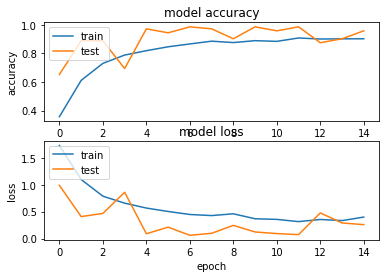

In [21]:
import matplotlib.pyplot as plt 
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()
